In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [14]:

m, k, h2m = 940.0, 100, 20.7
b_values = [0, 10, 30]

N, r_max = 1000, 4
dr = r_max / N

r = np.linspace(dr, r_max, N)

Energy (b = 0): 96.514 MeV
Energy (b = 10): 100.232 MeV
Energy (b = 30): 106.880 MeV


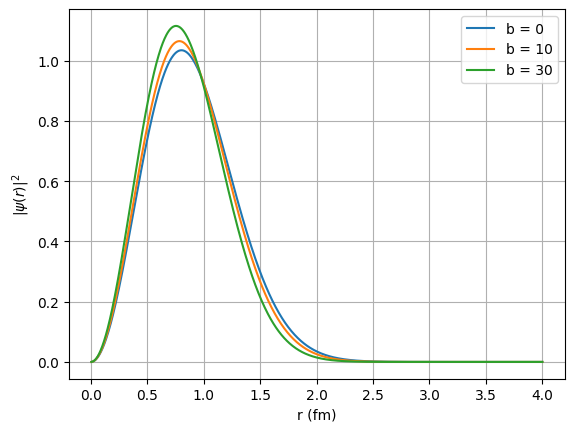

In [16]:
state = 0
for b in b_values:
    V = 0.5 * k * r**2 + (1/3) * b * r**3

    diags = h2m * (2 / dr**2) + V
    off_diags = np.full(N - 1, -h2m / dr**2)
    H = np.diag(diags) + np.diag(off_diags, -1) + np.diag(off_diags, 1)
    val, vec = eigh(H)

    E = val[state]
    psi = vec[:, state] / np.sqrt(dr)

    print(f"Energy (b = {b}): {E:.3f} MeV")
    plt.plot(r, psi**2, label=f"b = {b}")

plt.xlabel("r (fm)")
plt.ylabel("$|\psi(r)|^2$")
plt.legend()
plt.grid()
plt.show()
